In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns

from seaborn import load_dataset # this method will help us to #download the Titanic dataset
plt.style.use('ggplot')

np.random.seed(42)

In [ ]:
data=pd.read_csv(r"C:\Users\user\Downloads\training data.csv",encoding='UTF-8')

In [ ]:
# x=ProfileReport(data)
# x

In [ ]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [ ]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
fetch=data['label']
fetch

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

In [ ]:

feature=data.filter(['meanfun' , 'minfun', 'maxfun'],axis=1)
Data_frame_feature=pd.DataFrame(data=feature)
# feature=np.array(feature)
Data_frame_feature

,meanfun,minfun,maxfun
0,0.084279,0.015702,0.275862
1,0.107937,0.015826,0.250000
2,0.098706,0.015656,0.271186
3,0.088965,0.017798,0.250000
4,0.106398,0.016931,0.266667
...,...,...,...
3163,0.182790,0.083770,0.262295
3164,0.188980,0.034409,0.275862
3165,0.209918,0.039506,0.275862
3166,0.172375,0.034483,0.250000


In [ ]:

for col in Data_frame_feature.columns:
    print(Data_frame_feature[col].unique())


[0.08427911 0.10793655 0.09870626 ... 0.20991768 0.172375   0.18560693]
[0.01570167 0.01582591 0.01565558 0.01779755 0.01693122 0.0171123
 0.02622951 0.01775805 0.01795735 0.01930036 0.02206897 0.01913876
 0.01678909 0.025      0.02083333 0.01832761 0.01754386 0.01567091
 0.01571709 0.01576355 0.01614531 0.01568627 0.01609658 0.01564027
 0.01621074 0.01584158 0.01624365 0.0170394  0.01626016 0.01727862
 0.01656315 0.01675393 0.01634321 0.01841197 0.01661475 0.12121212
 0.01677149 0.01616162 0.01593625 0.0159204  0.016      0.01581028
 0.01606426 0.0162767  0.01577909 0.01873536 0.01724138 0.02179837
 0.02671119 0.02472952 0.0212766  0.02035623 0.0608365  0.02439024
 0.03333333 0.02725724 0.01652893 0.05405405 0.01886792 0.01603206
 0.01595214 0.01853998 0.02618658 0.01666667 0.02113606 0.01668405
 0.01851852 0.0201005  0.0199005  0.02507837 0.01814059 0.01573255
 0.01767956 0.01789709 0.01579467 0.01612903 0.01635992 0.01639344
 0.01760176 0.01741023 0.01649485 0.01766004 0.01707577 0.

In [ ]:
target=pd.get_dummies(data=fetch,drop_first=True)
target=np.array(target)
target

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [ ]:
target_dataframe=pd.DataFrame(data=target)
target_dataframe[0].unique()

array([1, 0], dtype=uint8)

In [ ]:
feature

,meanfun,minfun,maxfun
0,0.084279,0.015702,0.275862
1,0.107937,0.015826,0.250000
2,0.098706,0.015656,0.271186
3,0.088965,0.017798,0.250000
4,0.106398,0.016931,0.266667
...,...,...,...
3163,0.182790,0.083770,0.262295
3164,0.188980,0.034409,0.275862
3165,0.209918,0.039506,0.275862
3166,0.172375,0.034483,0.250000


In [ ]:
feature = (feature  -feature.mean())/feature.std()

<AxesSubplot:>

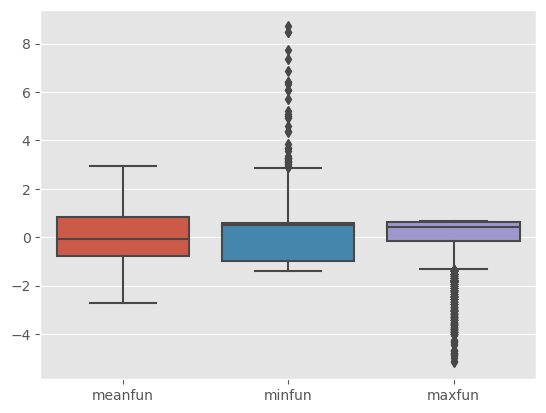

In [ ]:
sns.boxplot(data=feature)

In [ ]:
# Q1 = np.percentile(feature, 25, interpolation = 'midpoint')
# Q3 = np.percentile(feature, 75, interpolation = 'midpoint')
# IQR = Q3 - Q1
# IQR

In [ ]:
for col in feature.columns:                                               # This cell deal with the outliers
    mean=feature[col].mean()                                              # After scalling any value is more than 3 it considerd as outlier, I made it equal to the mean
    std=feature[col].std()
    Q1 = np.percentile(feature[col], 25, interpolation = 'midpoint')
    Q3 = np.percentile(feature[col], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    print(IQR)
    for i in range(3168):
        if(feature[col][i]>(Q3+1.5*IQR) or feature[col][i]<(Q1-1.5*IQR)):

            feature[col][i]=mean

1.6282220252662492
1.5442784022030334
0.7809339957872964


<AxesSubplot:>

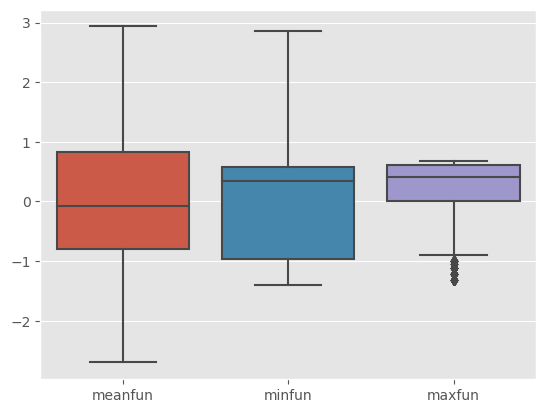

In [ ]:
sns.boxplot(data=feature)

In [ ]:
feature=np.array(feature)
feature

array([[-1.81175223, -1.0978248 ,  0.56586921],
       [-1.07942402, -1.09136033, -0.29398393],
       [-1.36515237, -1.10022288,  0.41041553],
       ...,
       [ 2.07745307,  0.1407061 ,  0.56586921],
       [ 0.91530045, -0.12065845, -0.29398393],
       [ 1.32490168,  1.32440501,  0.41041553]])

In [ ]:
from sklearn.model_selection import train_test_split
feature_train,feature_test,target_train,target_test=train_test_split(feature,target,random_state=50,train_size=0.45)

In [ ]:
model = LogisticRegression (solver = 'liblinear')
model.fit (feature_train, target_train)
predictions = model.predict(feature_test)
report = classification_report (target_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       877
           1       0.95      0.96      0.96       866

    accuracy                           0.96      1743
   macro avg       0.96      0.96      0.96      1743
weighted avg       0.96      0.96      0.96      1743



d:\Programs_Work\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model=LinearSVC()
model.fit(feature_train,target_train)
train_pred=model.predict(feature_train)
y_preds=model.predict(feature_test)

print(f"Training score = {metrics.accuracy_score(target_train,train_pred)}")
print(f"Testing score = {metrics.accuracy_score(target_test,y_preds)}")

Training score = 0.9628070175438597
Testing score = 0.9569707401032702


d:\Programs_Work\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


d:\Programs_Work\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Programs_Work\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Programs_Work\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Text(0, 0.5, 'accuracy')

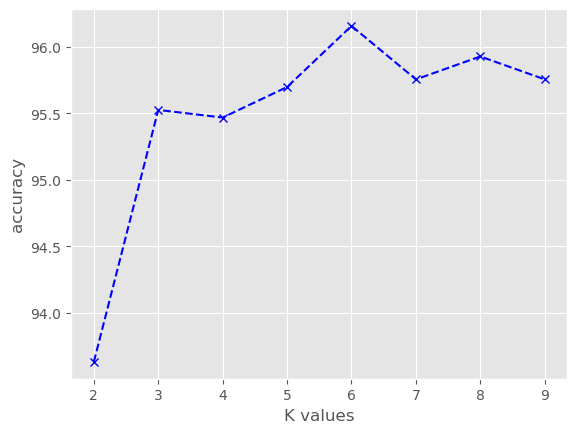

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy_vals = []
for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(feature_train, target_train)
    Y_pred = knn.predict(feature_test)
    accuracy_vals.append(metrics.accuracy_score(Y_pred, target_test) * 100)
plt.plot(range(2,10) , accuracy_vals, color='blue' , marker='x', linestyle='dashed')
plt.xlabel('K values')
plt.ylabel('accuracy')

d:\Programs_Work\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Programs_Work\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Programs_Work\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Text(0, 0.5, 'Error Rate')

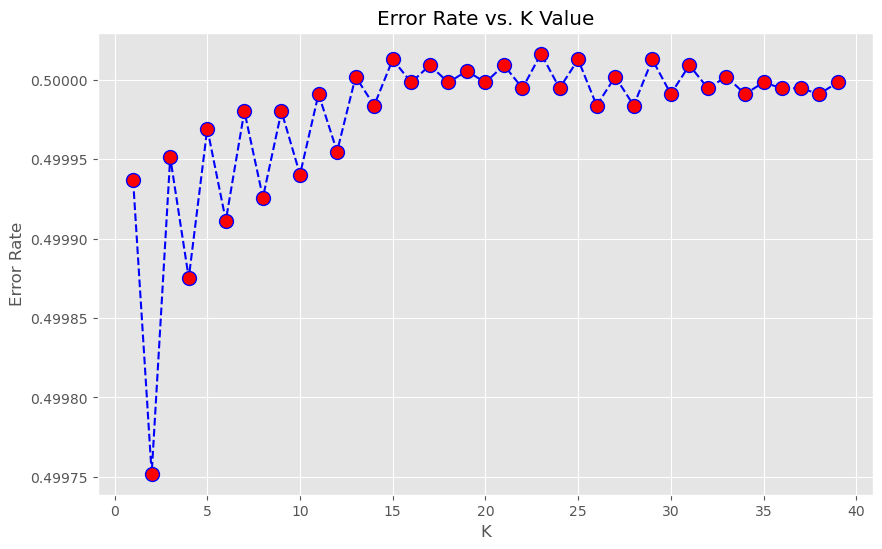

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(feature_train,target_train)
    pred_i = knn.predict(feature_test)
    error_rate.append(np.mean(pred_i != target_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(feature_train,target_train)

pred = knn.predict(feature_test)

acc  = accuracy_score(target_test,pred)
acc

d:\Programs_Work\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Programs_Work\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9615605278255881